In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

60.28609971093971 143.38483543085852
58.0078269507834 -120.93560765361057
-71.89570450506554 151.9992842738801
55.1121903122453 -79.69203295426901
86.65736200878715 159.34023642703522
12.166145590788446 79.75301772175101
-3.4450654210628073 171.44520951277246
19.073493848751127 -88.72083386304702
49.50281032521684 -154.12452729946187
-40.4452491123754 168.62994823852983
72.38879461316327 -6.950312243349316
-40.474702448058565 -30.713886122252575
-6.557641630033814 119.64247107726152
-67.06039488319949 -57.16617787248347
37.76953405557248 -50.26972947113697
33.27380799572268 17.81242136690966
47.25506369253236 -64.45419193380351
-10.72825823549914 30.31857255350255
14.775203372023697 86.99790238295975
-74.30287690604875 71.66426058504226
-77.63483818597079 94.42700865256899
-9.791718366184256 121.52320922053417
-11.172052321664893 63.46155724915633
65.94279515480011 -17.694416779285177
-6.875506543019682 73.74512791407705
79.61949939313499 -59.006037047575674
2.2283856027318194 174.6146

59.97543514607449 137.50481657980544
-71.6254826097026 108.8724514968365
57.46175487437563 143.55800782092473
-53.301502950483744 -162.70300274681645
-70.36969648870608 76.34375212539464
-66.48474402526772 88.36035899244723
-62.40690268879909 -160.50565154543767
43.835138059239654 152.64756157953343
63.15539258286239 77.85723172701762
-87.6678026003888 -6.154156852979526
-36.60204113010808 157.2504383926982
-39.58185592479138 78.29011689326012
55.828549283254404 132.0879798901148
-70.03434969638533 -126.58463580021721
-86.88131312350316 -5.34385474776488
-61.98728404765725 -139.52408506541897
79.25976221049072 93.90213537032093
9.036792696994965 93.65920101566934
56.16375197320963 69.33775186846668
62.957102817172 -8.319960784328487
-86.34964704417396 143.75303267478176
9.126261751852482 162.9898721831279
-74.23783484840116 -9.514748526608741
5.5161828608478345 60.48576209227144
-51.2155956381876 -141.30723269170878
89.31095194730466 71.82719486154642
-72.29559470741043 -114.7533912516

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

582

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0daf7b5557550319ff3b2e20dbc0fda


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okhotsk
Processing Record 2 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | tindivanam
Processing Record 7 of Set 1 | utiroa
City not found. Skipping...
Processing Record 8 of Set 1 | chunhuhub
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | westport
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | galesong
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | surt
Processing Record 17 of Set 1 | alberton
Processing Record 18 of Set 1 | luwingu
Processing Record 19 of Set 1 | narasannapeta
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Proce

Processing Record 38 of Set 4 | daru
Processing Record 39 of Set 4 | teya
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | ketchikan
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | ibotirama
Processing Record 45 of Set 4 | atuona
Processing Record 46 of Set 4 | puri
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | siniscola
Processing Record 1 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 5 | bartica
Processing Record 3 of Set 5 | gorontalo
Processing Record 4 of Set 5 | bequimao
Processing Record 5 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 5 | voloshka
Processing Record 7 of Set 5 | rongcheng
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | jumla
Processing Record 10 of Set 5 | vilh

Processing Record 29 of Set 8 | saint-augustin
Processing Record 30 of Set 8 | ahipara
Processing Record 31 of Set 8 | salalah
Processing Record 32 of Set 8 | aranos
Processing Record 33 of Set 8 | kodinsk
Processing Record 34 of Set 8 | calvinia
Processing Record 35 of Set 8 | truth or consequences
Processing Record 36 of Set 8 | cancun
Processing Record 37 of Set 8 | paoua
Processing Record 38 of Set 8 | liverpool
Processing Record 39 of Set 8 | dikson
Processing Record 40 of Set 8 | luau
Processing Record 41 of Set 8 | dubai
Processing Record 42 of Set 8 | sadon
Processing Record 43 of Set 8 | ternate
Processing Record 44 of Set 8 | huarmey
Processing Record 45 of Set 8 | cerritos
Processing Record 46 of Set 8 | caravelas
Processing Record 47 of Set 8 | kegayli
City not found. Skipping...
Processing Record 48 of Set 8 | chifeng
Processing Record 49 of Set 8 | yima
Processing Record 50 of Set 8 | magadi
Processing Record 1 of Set 9 | smithers
Processing Record 2 of Set 9 | vila do ma

Processing Record 17 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 18 of Set 12 | charters towers
Processing Record 19 of Set 12 | linkoping
Processing Record 20 of Set 12 | panama city
Processing Record 21 of Set 12 | lazaro cardenas
Processing Record 22 of Set 12 | nanakuli
Processing Record 23 of Set 12 | boden
Processing Record 24 of Set 12 | liwonde
Processing Record 25 of Set 12 | sorata
Processing Record 26 of Set 12 | paamiut
Processing Record 27 of Set 12 | sinjah
City not found. Skipping...
Processing Record 28 of Set 12 | labytnangi
Processing Record 29 of Set 12 | sorland
Processing Record 30 of Set 12 | wajir
Processing Record 31 of Set 12 | kalmunai
Processing Record 32 of Set 12 | alekseyevka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okhotsk,59.3833,143.3000,58.87,94,100,3.38,RU,2022-07-20 20:25:05
1,Hobart,-42.8794,147.3294,35.06,94,0,8.05,AU,2022-07-20 20:20:07
2,Cherskiy,68.7500,161.3000,40.30,72,26,12.95,RU,2022-07-20 20:25:06
3,Tindivanam,12.2500,79.6500,80.76,77,17,3.40,IN,2022-07-20 20:25:06
4,Chunhuhub,19.5500,-88.6833,96.87,34,49,7.56,MX,2022-07-20 20:25:07
5,Kodiak,57.7900,-152.4072,54.91,76,0,5.75,US,2022-07-20 20:22:44
6,Westport,41.1415,-73.3579,98.89,47,0,10.36,US,2022-07-20 20:25:08
7,Klaksvik,62.2266,-6.5890,49.12,91,98,18.54,FO,2022-07-20 20:25:08
8,Arraial Do Cabo,-22.9661,-42.0278,73.26,78,20,8.05,BR,2022-07-20 20:23:03
9,Galesong,-5.3166,119.3661,73.42,85,12,5.30,ID,2022-07-20 20:25:09


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Okhotsk,RU,2022-07-20 20:25:05,59.3833,143.3000,58.87,94,100,3.38
1,Hobart,AU,2022-07-20 20:20:07,-42.8794,147.3294,35.06,94,0,8.05
2,Cherskiy,RU,2022-07-20 20:25:06,68.7500,161.3000,40.30,72,26,12.95
3,Tindivanam,IN,2022-07-20 20:25:06,12.2500,79.6500,80.76,77,17,3.40
4,Chunhuhub,MX,2022-07-20 20:25:07,19.5500,-88.6833,96.87,34,49,7.56


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

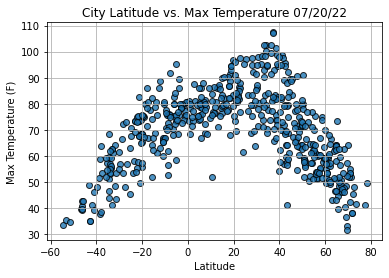

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

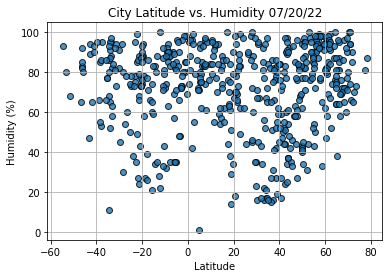

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

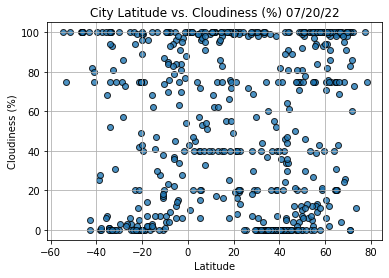

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

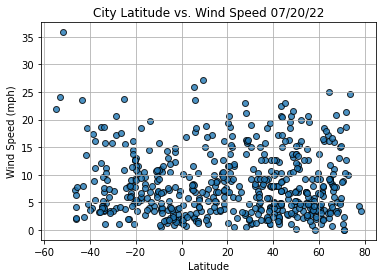

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Alberton
Country                        CA
Date          2022-07-20 20:25:11
Lat                       46.8168
Lng                      -64.0654
Max Temp                    77.13
Humidity                       63
Cloudiness                      8
Wind Speed                  16.33
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Okhotsk,RU,2022-07-20 20:25:05,59.3833,143.3000,58.87,94,100,3.38
2,Cherskiy,RU,2022-07-20 20:25:06,68.7500,161.3000,40.30,72,26,12.95
3,Tindivanam,IN,2022-07-20 20:25:06,12.2500,79.6500,80.76,77,17,3.40
4,Chunhuhub,MX,2022-07-20 20:25:07,19.5500,-88.6833,96.87,34,49,7.56
5,Kodiak,US,2022-07-20 20:22:44,57.7900,-152.4072,54.91,76,0,5.75


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

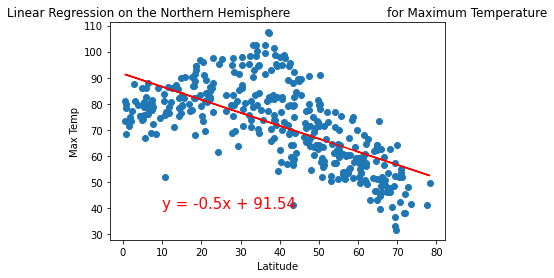

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

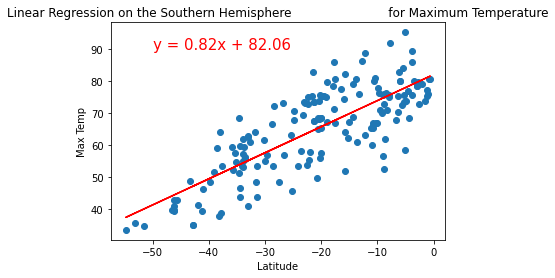

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

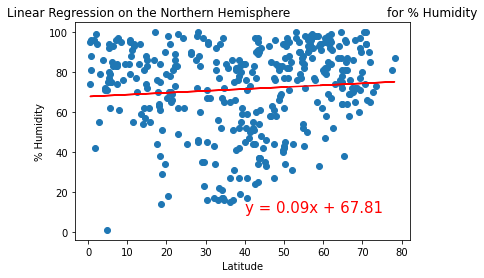

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

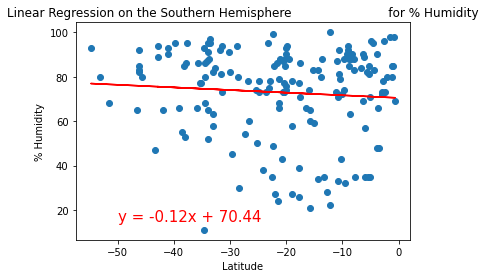

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

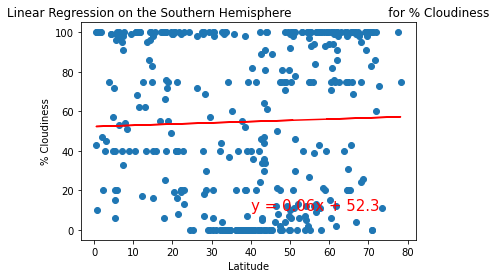

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

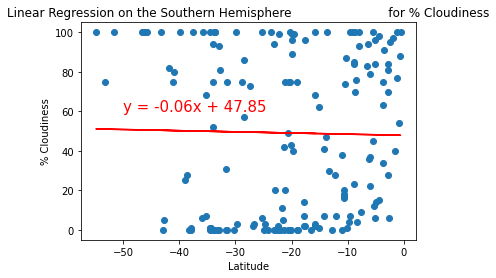

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

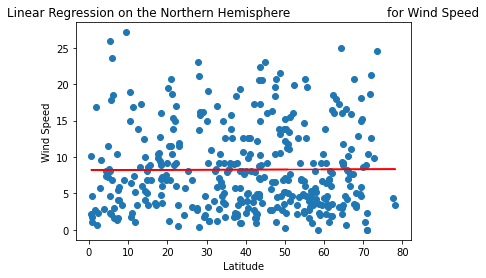

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

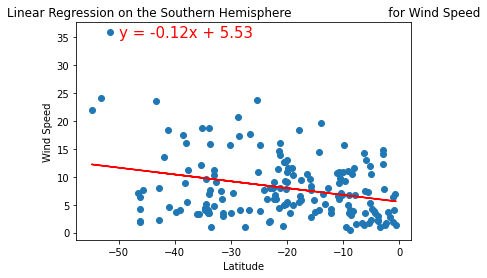

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))